# ODE solvers

In [1]:
# Python Libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import newton
import pandas as pd

# Euler methods, Cranck-Nicolson, Runge-Kutta methods

In [2]:
# Numerical methods
def Forward_Euler(tn, y0, odefun): # Forward Euler methods approximating dy/dt = odefun(t,y), y(0) = y0
    yh = np.zeros(tn.size)
    
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        yh[j+1] = yh[j] + h*odefun(tn[j], yh[j]) 
    return yh

def Backward_Euler(tn, y0, odefun):
    yh = np.zeros(tn.size)
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        be_fun = lambda y: y - h*odefun(tn[j+1], y) - yh[j]
        yh[j+1] = newton(be_fun, yh[j])
    return  yh

def Modified_Euler(tn, y0, odefun):
    yh = np.zeros(tn.size)
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        ystar = yh[j] + h*odefun(tn[j], yh[j]) 
        yh[j+1] = yh[j] + h*odefun(tn[j+1], ystar)
    return yh

def Crank_Nicolson(tn, y0, odefun):
    yh = np.zeros(tn.size)
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        cn_fun = lambda y: y - (h/2)*odefun(tn[j+1], y) - yh[j] -(h/2)*odefun(tn[j], yh[j])
        yh[j+1] = newton(cn_fun, yh[j])
    return yh

def RK2(tn, y0, odefun): # A =[0,0;1,0], c = [0,1], b = [1/2, 1/2]
    yh = np.zeros(tn.size)
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        K1 = odefun(tn[j], yh[j])
        K2 = odefun(tn[j+1], yh[j]+h*K1)
        yh[j+1] = yh[j]+(h)*(0.5*K1+0.5*K2)
    return yh

def RK3(tn, y0, odefun): # A = [0,0,0;1/2,0,0;-1,2,0], c = [0,1/2,1], b = [1/6, 2/3, 1/6]
    yh = np.zeros(tn.size)
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        K1 = odefun(tn[j], yh[j])
        K2 = odefun(tn[j]+0.5*h, yh[j]+h*0.5*K1)
        K3 = odefun(tn[j+1], yh[j]+h*(-1*K1+2*K2))
        yh[j+1] = yh[j]+(h)*(1.0/6.0*K1+2.0/3.0*K2+1.0/6.0*K3)
    return yh

def RK4(tn, y0, odefun): # A = [0,0,0,0;1/2,0,0,0;0,1/2,0,0; 0,0,1,0], c = [0,1/2,1/2,1], b = [1/6, 1/3,1/3, 1/6]
    yh = np.zeros(tn.size)
    yh[0] = y0
    for j in range(0, tn.size-1):
        h = tn[j+1]-tn[j]
        K1 = odefun(tn[j], yh[j])
        K2 = odefun(tn[j]+0.5*h, yh[j]+h*0.5*K1)
        K3 = odefun(tn[j]+0.5*h, yh[j]+h*(0.5*K2))
        K4 = odefun(tn[j+1], yh[j]+h*(1*K3))
        yh[j+1] = yh[j]+(h)*(1.0/6.0*K1+1.0/3.0*K2+1.0/3.0*K3+1.0/6.0*K4)
    return yh



## Problem 1.

Consider the Cauchy problem:
$$ 
\frac{dy(t)}{dt} = \cos(2 y(t)), \quad t\in[0,1],\quad \mbox{and initial condition}\,\,y(0) = 0
$$

In [3]:
# define problem
def f1(t,y):
    return np.cos(2*y)
def y1(t):
    return 0.5*np.arcsin((np.exp(4*t)-1)/(np.exp(4*t)+1))
# initial condition
y0 = 0
# time interval
t0 = 0
T  = 1

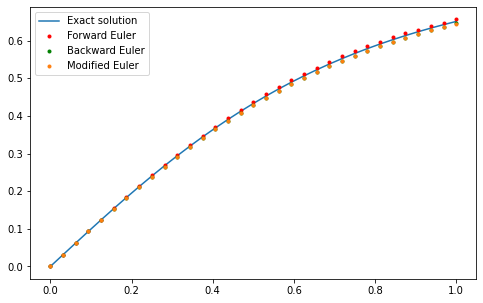

In [4]:
# Approximate solution for 
N = 32
# tn values
tn = np.linspace(t0, T, N+1)

# Solution forward Euler
yh_fe = Forward_Euler(tn, y0, f1)
# Solution backward Euler
yh_be = Backward_Euler(tn, y0, f1)
# Solution Modified Euler
yh_me = Modified_Euler(tn, y0, f1)
plt.figure(figsize=(8,5))
plt.plot(tn, y1(tn))
plt.plot(tn, yh_fe, '.r')
plt.plot(tn, yh_be, '.g')
plt.plot(tn, yh_me, '.')
plt.legend(['Exact solution', 'Forward Euler', 'Backward Euler', 'Modified Euler'])
plt.show()

### Convergence Table first order schemes

In [5]:
# number of subintervals
NN = [2,4,8,16,32,64,128, 256, 512, 1024]
h  = [(T-t0)/N for N in NN]
Error_fe = []
Error_be = []
Error_me = []
for N in NN:
    # tn values
    tn = np.linspace(t0, T, N+1)
    # initial condition
    y0 = 0
    # Solution forward Euler
    yh_fe = Forward_Euler(tn, y0, f1)
    # Solution backward Euler
    yh_be = Backward_Euler(tn, y0, f1)
    # Solution Modified Euler
    yh_me = Modified_Euler(tn, y0, f1)
    
    # Compute Error
    Error_fe.append(abs(y1(tn[-1])-yh_fe[-1]))
    Error_be.append(abs(y1(tn[-1])-yh_be[-1]))
    Error_me.append(abs(y1(tn[-1])-yh_me[-1]))
# end for


# rates of convergence
r_fe = np.zeros(len(h))
r_be = np.zeros(len(h))
r_me = np.zeros(len(h))
for j in range(len(h)-1):
    r_fe[j+1] = np.log(Error_fe[j+1]/Error_fe[j])/np.log(h[j+1]/h[j])
    r_be[j+1] = np.log(Error_be[j+1]/Error_be[j])/np.log(h[j+1]/h[j])
    r_me[j+1] = np.log(Error_me[j+1]/Error_me[j])/np.log(h[j+1]/h[j])

d = {'h': h, 'Forward Euler Error': Error_fe, 'p FE': r_fe,
             'Backward Euler Error': Error_be, 'p BE': r_be,
             'Modified Euler Error': Error_me, 'p ME': r_me, }
df = pd.DataFrame(data=d)

df.style.format({'h':'{:.2e}', 
                 'Forward Euler Error':'{:.2e}', 'p FE':'{:.2f}',
                 'Backward Euler Error':'{:.2e}', 'p BE':'{:.2f}',
                 'Modified Euler Error':'{:.2e}', 'p ME':'{:.2f}'}
               ).set_caption("Convergence Table for first order Euler methods")



,h,Forward Euler Error,p FE,Backward Euler Error,p BE,Modified Euler Error,p ME
0,5.00e-01,1.19e-01,0.00,7.65e-02,0.00,2.95e-01,0.00
1,2.50e-01,4.88e-02,1.29,4.08e-02,0.91,8.70e-02,1.76
2,1.25e-01,2.31e-02,1.08,2.11e-02,0.95,3.12e-02,1.48
3,6.25e-02,1.13e-02,1.03,1.08e-02,0.97,1.31e-02,1.25
4,3.12e-02,5.56e-03,1.02,5.45e-03,0.99,6.00e-03,1.13
5,1.56e-02,2.77e-03,1.01,2.74e-03,0.99,2.87e-03,1.06
6,7.81e-03,1.38e-03,1.00,1.37e-03,1.00,1.41e-03,1.03
7,3.91e-03,6.89e-04,1.00,6.87e-04,1.00,6.95e-04,1.02
8,1.95e-03,3.44e-04,1.00,3.44e-04,1.00,3.46e-04,1.01
9,9.77e-04,1.72e-04,1.00,1.72e-04,1.00,1.72e-04,1.00


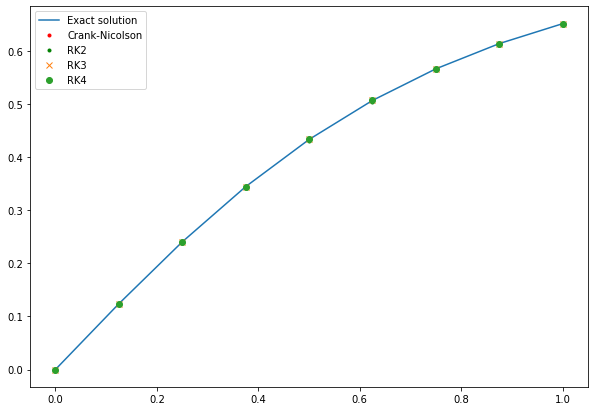

In [6]:
# Approximate solution for 
N = 8
# tn values
tn = np.linspace(t0, T, N+1)

# Solution Crank-Nicolson
yh_cn = Crank_Nicolson(tn, y0, f1)
# Solution RK2
yh_rk2 = RK2(tn, y0, f1)
# Solution RK3
yh_rk3 = RK3(tn, y0, f1)
# Solution RK4
yh_rk4 = RK4(tn, y0, f1)

plt.figure(figsize=(10,7))
plt.plot(tn, y1(tn))
plt.plot(tn, yh_cn, '.r')
plt.plot(tn, yh_rk2, '.g')
plt.plot(tn, yh_rk3, 'x')
plt.plot(tn, yh_rk4, 'o')
plt.legend(['Exact solution', 'Crank-Nicolson', 'RK2', 'RK3', 'RK4'])
plt.show()

### Convergence Table high order methods

In [7]:
# number of subintervals
NN = [2,4,8,16,32,64,128, 256, 512, 1024]
h  = [(T-t0)/N for N in NN]
Error_cn = []
Error_rk2 = []
Error_rk3 = []
Error_rk4 = []
for N in NN:
    # tn values
    tn = np.linspace(t0, T, N+1)
    # initial condition
    y0 = 0
    # Solution Crank-Nicolson
    yh_cn = Crank_Nicolson(tn, y0, f1)
    # Solution RK2
    yh_rk2 = RK2(tn, y0, f1)
    # Solution RK3
    yh_rk3 = RK3(tn, y0, f1)
    # Solution RK4
    yh_rk4 = RK4(tn, y0, f1)
    
    # Compute Error
    Error_cn.append(abs(y1(tn[-1])-yh_cn[-1]))
    Error_rk2.append(abs(y1(tn[-1])-yh_rk2[-1]))
    Error_rk3.append(abs(y1(tn[-1])-yh_rk3[-1]))
    Error_rk4.append(abs(y1(tn[-1])-yh_rk4[-1]))
# end for


# rates of convergence
r_cn = np.zeros(len(h))
r_rk2 = np.zeros(len(h))
r_rk3 = np.zeros(len(h))
r_rk4 = np.zeros(len(h))
for j in range(len(h)-1):
    r_cn[j+1]  = np.log(Error_cn[j+1]/Error_cn[j])/np.log(h[j+1]/h[j])
    r_rk2[j+1] = np.log(Error_rk2[j+1]/Error_rk2[j])/np.log(h[j+1]/h[j])
    r_rk3[j+1] = np.log(Error_rk3[j+1]/Error_rk3[j])/np.log(h[j+1]/h[j])
    r_rk4[j+1] = np.log(Error_rk4[j+1]/Error_rk4[j])/np.log(h[j+1]/h[j])

d = {'h': h, 'Crank-Nicolson Error': Error_cn, 'p CN': r_cn,
             'RK2 Error': Error_rk2, 'p RK2': r_rk2,
             'RK3 Error': Error_rk3, 'p RK3': r_rk3, 
             'RK4 Error': Error_rk4, 'p RK4': r_rk4, }
df = pd.DataFrame(data=d)

df.style.format({'h':'{:.2e}', 
                 'Crank-Nicolson Error':'{:.2e}', 'p CN':'{:.2f}',
                 'RK2 Error':'{:.2e}', 'p RK2':'{:.2f}',
                 'RK3 Error':'{:.2e}', 'p RK3':'{:.2f}',
                 'RK4 Error':'{:.2e}', 'p RK4':'{:.2f}'}
               ).set_caption("Convergence Table for high order methods")

,h,Crank-Nicolson Error,p CN,RK2 Error,p RK2,RK3 Error,p RK3,RK4 Error,p RK4
0,5.00e-01,6.75e-04,0.00,6.57e-02,0.00,9.14e-03,0.00,2.44e-03,0.00
1,2.50e-01,1.95e-04,1.79,1.18e-02,2.47,1.05e-03,3.12,1.21e-04,4.34
2,1.25e-01,4.95e-05,1.97,2.48e-03,2.25,1.23e-04,3.10,6.63e-06,4.19
3,6.25e-02,1.24e-05,1.99,5.71e-04,2.12,1.49e-05,3.05,3.89e-07,4.09
4,3.12e-02,3.11e-06,2.00,1.37e-04,2.06,1.82e-06,3.03,2.35e-08,4.05
5,1.56e-02,7.78e-07,2.00,3.35e-05,2.03,2.26e-07,3.01,1.45e-09,4.02
6,7.81e-03,1.95e-07,2.00,8.29e-06,2.01,2.81e-08,3.01,8.97e-11,4.01
7,3.91e-03,4.86e-08,2.00,2.06e-06,2.01,3.51e-09,3.00,5.59e-12,4.01
8,1.95e-03,1.22e-08,2.00,5.14e-07,2.00,4.38e-10,3.00,3.48e-13,4.00
9,9.77e-04,3.04e-09,2.00,1.28e-07,2.00,5.47e-11,3.00,2.18e-14,4.00


# Runge-Kutta methods
Consider a system of ordinary differential equations
\begin{equation}
\frac{dy}{dt} = f(t,y)
\end{equation}

Then the $s$-stages Runge-Kutta method is defined by

\begin{equation}
\begin{array}{rcl}
\displaystyle
y_{n+1}&=&
\displaystyle
y_{n}+\Delta t\sum_{i=1}^{s} b_{i} k_{i}\\
\displaystyle
k_i&=& 
\displaystyle
f(t_{n}+c_{i}\Delta t, y_{n}+\Delta t\sum_{j=1}^{s}a_{ij}k_{j}) \\
\end{array}
\end{equation}
for $i=1,...,s$. The coefficients of the methods $c_i, b_i, a_{ij}$ for $i,j =1,...,s$ are represented in the Butcher Tableu. 

\begin{array}{cccc|c|}
  a_{11}  & a_{12} & \ldots & a_{1s} & c_{1} \\
  a_{21}  & a_{22} & \ldots & a_{2s} & c_{2} \\
  \vdots  & \vdots & \ldots & \vdots & \vdots \\
  a_{s1}  & a_{s2} & \ldots & a_{ss} & c_{s} \\\hline
  b_1     & b_{2}  & \ldots & b_{s}  & 
\end{array}

See https://en.wikipedia.org/wiki/List_of_Runge–Kutta_methods#Implicit_methods




# Symplectic methods for Hamiltonian systems

Consider the Hamiltonian system for $p,q\in \mathbb R^{n}$,
\begin{equation}
\begin{array}{rcl}
\displaystyle 
\frac{d p}{d t} &=& 
\displaystyle- \frac{\partial H}{\partial q}(p,q,t) \\
\displaystyle
\frac{d q}{d t} &=& 
\displaystyle
\frac{\partial H}{\partial p}(p,q,t)
\end{array}
\end{equation}
where $H(p,q,t)$ is the Hamiltonian function.

Equivalently we can write the system as a stadard ODE system with $y = (p^{T}, q^{T})^{T}$

\begin{equation}
\frac{d y}{dt} = 
\begin{pmatrix}
0 & -I \\
I & 0
\end{pmatrix}
\begin{pmatrix}
\frac{\partial H}{\partial p} \\
\frac{\partial H}{\partial q}
\end{pmatrix}
=
J^{-1} \nabla H(y,t)
\end{equation}

## Explicit methods
We can obtain and explicit symplectic integrator if the Hamiltonian funcion is separable, i.e., H(p,q) = $T(p) + U(q)$. For instance, the symplectic Euler method and Stormer-Verlet method.

- Symplectic Euler method
\begin{equation}
\begin{array}{rcl}
\displaystyle
p_{n+1} &=& 
\displaystyle
p_{n} - \Delta t \frac{\partial H}{\partial q}(p_{n+1}, q_{n}) \\
\displaystyle
q_{n+1} &=& 
\displaystyle
q_{n} + \Delta t \frac{\partial H}{\partial p}(p_{n+1}, q_{n}) 
\end{array}
\end{equation}

We observe that first equation is in general implicit. However if $H(p,q) = T(p) + U(q)$ we can write the method as

\begin{equation}
\begin{array}{rcl}
\displaystyle
p_{n+1} &=&  
\displaystyle
p_{n} - \Delta t U'(q_{n})\\
\displaystyle
q_{n+1} &=& 
\displaystyle
q_{n} + \Delta t T'(p_{n+1})
\end{array}
\end{equation}


- Stormer-Verlet method

\begin{equation}
\begin{array}{rcl}
\displaystyle
p_{n+1/2} &=& 
\displaystyle
p_{n} - \frac{\Delta t}{2} \frac{\partial H}{\partial q}(p_{n+1/2},q_{n})  
\\
\displaystyle
q_{n+1} &=& 
\displaystyle 
q_{n} + \frac{\Delta t}{2}\left( \frac{\partial H}{\partial p}(p_{n+1/2}, q_{n}) + \frac{\partial H}{\partial p}(p_{n+1/2}, q_{n+1})\right) \\
\displaystyle
p_{n+1} &=& 
\displaystyle
p_{n+1/2} - \frac{\Delta t}{2} \frac{\partial H}{\partial q}(p_{n+1/2}, q_{n+1}) 
\end{array}
\end{equation}

Again, this method is in general implicit. However if $H(p,q) = T(p) + U(q)$ we can write the method as

\begin{equation}
\begin{array}{rcl}
\displaystyle
p_{n+1/2} &=& 
\displaystyle
p_{n} - \frac{\Delta t}{2} U'(q_{n})  
\\
\displaystyle
q_{n+1} &=& 
\displaystyle 
q_{n} + \frac{\Delta t}{2}\left( T'(p_{n+1/2}) + T'(p_{n+1/2})\right) \\
\displaystyle
p_{n+1} &=& 
\displaystyle
p_{n+1/2} - \frac{\Delta t}{2} U'(q_{n+1}) 
\end{array}
\end{equation}

## Partitioned Runge-Kutta method

Partitioned Runge Kutta method applies two Runge Kutta schemes to solve the Hamiltonian system. As the previous cases, if the Hamiltonian is separable we obtain an explicit method

\begin{equation}
\begin{array}{rclcrcl}
\displaystyle
p^{n,i} &=&
\displaystyle
p^{n} + \Delta t \sum_{j=1}^{i} b_{j} k_{j}, 
&&
\displaystyle
q^{n,i} &=& 
\displaystyle
q^{n} + \Delta t \sum_{j=1}^{i-1} \tilde{b}_{j} \tilde{k}_{j}
\\
\displaystyle
k_{i}
&=&
\displaystyle
-\frac{\partial H}{\partial q}(p^{n,i}, q^{n,i}, t+c_i\Delta t),
&&
\displaystyle
\tilde{k}_i 
&=&
\displaystyle
\frac{\partial H}{\partial p}(p^{n,i}, q^{n,i}, t+\tilde{c}_i\Delta t)
\end{array}
\end{equation}

\begin{array}{cccc|c|}
  b_{1}  & 0.    & \ldots & 0 & b_{1} \\
  b_{1}  & b_{2} & \ddots & \vdots & b_1+b_2 \\
  \vdots & \vdots& \ddots & 0 & \vdots \\
  b_{1}  & b_{2} & \ldots & b_{s} & \sum_{i=1}^{s} b_i\\\hline
  b_1     & b_{2}  & \ldots & b_{s}  & 
\end{array} 


\begin{array}{cccc|c|}
  0  & 0.    & \ldots & 0 & 0\\
  \tilde{b}_{1}  & 0 & \ddots & \vdots & \tilde{b}_1\\
  \vdots & \ddots& \ddots & 0 & \vdots \\
  \tilde{b}_{s}  & \ldots & \tilde{b}_{s-1} & 0 & \sum_{i=1}^{s-1} \tilde{b}_i\\\hline
  \tilde{b}_1     & \tilde{b}_{2}  & \ldots & \tilde{b}_{s}  & 
\end{array}

In [8]:
def ESRKcoeffs(q,p):
    bp = np.zeros(q, dtype=np.float64)
    bq = np.zeros(q, dtype=np.float64)
    if q == 1 and p == 1: # Symplectic Euler
        bq[0] = 1.0

        bp[0] = 1.0

    elif q == 3 and p == 3: # Ruth, R.D. method: A canonical integration technique. IEEE Trans. Nuclear Sci. 30, 2669-2671 (1983)
        bq[0] = 7.0/24.0
        bq[1] = 3.0/4.0
        bq[2] = -1.0/24.0

        bp[0] = 2.0/3.0
        bp[1] = -2.0/3.0
        bp[2] = 1.0

    elif q == 6 and p == 4:
        bq[0] = 7.0/48.0
        bq[1] = 3.0/8.0
        bq[2] = -1.0/48.0
        bq[3] = -1.0/48.0
        bq[4] = 3.0/8.0
        bq[5] = 7.0/48.0

        bp[0] = 1.0/3.0
        bp[1] = -1.0/3.0
        bp[2] = 1.0
        bp[3] = -1.0/3.0
        bp[4] = 1.0/3.0
        bp[5] = 0.0

    elif q == 6 and p == 5:  # McLachlan and Atela  The accuracy of symplectic integrators. Nonlinearity 5, 541-562 (1992)
        bq[0] = 0.1193900292875672758
        bq[1] = 0.6989273703824752308
        bq[2] = -0.1713123582716007754
        bq[3] = 0.4012695022513534480
        bq[4] = 0.0107050818482359840
        bq[5] = -0.0589796254980311632

        bp[0] = 0.339839625839110000 
        bp[1] = -0.088601336903027329 
        bp[2] = 0.5858564768259621188 
        bp[3] = -0.6030393565364911888 
        bp[4] = 0.3235807965546976394 
        bp[5] = 0.4423637942197494587 

    elif q == 11 and p == 6: # S. Blanesa,  P.C. Moanb Practical symplectic partitioned Runge-Kutta and Runge-Kutta-Nystrom methods(2001)
        bq[0] = 0.0502627644003922  
        bq[1] = 0.413514300428344    
        bq[2] = 0.0450798897943977   
        bq[3] = -0.188054853819569   
        bq[4] = 0.541960678450780    
        bq[5] = 1.0-2.0*(bq[0]+bq[1]+bq[2]+bq[3]+bq[4]) 
        bq[6] = bq[4]
        bq[7] = bq[3]
        bq[8] = bq[2]
        bq[9] = bq[1]
        bq[10] = bq[0]

        bp[0] = 0.148816447901042
        bp[1] = -0.132385865767784
        bp[2] = 0.067307604692185
        bp[3] = 0.432666402578175
        bp[4] = .5-(bp[0]+bp[1]+bp[2]+bp[3]) 
        bp[5] = bp[4]
        bp[6] = bp[3]
        bp[7] = bp[2]
        bp[8] = bp[1]
        bp[9] = bp[0]
        bp[10] = 0.0
        
    else:
        print("Invalid (p,q) entries")

    return bq, bp
        